In [0]:
pdf = spark.table(
    "healthcare_analytics.gold_patient_latest_vitals"
).toPandas()

In [0]:
pdf.isnull().sum()
pdf.describe()

,patient_id,heart_rate,systolic_bp,oxygen_level,event_time,ingest_ts
count,424.000000,424.000000,424.000000,424.000000,424,424
mean,253.155660,92.464623,134.073113,92.261792,2026-01-18 07:04:23.239919616,2026-01-18 18:15:10.596999936
min,3.000000,55.000000,90.000000,85.000000,2026-01-18 07:03:25.729735,2026-01-18 18:15:10.597000
25%,129.750000,73.000000,111.000000,88.000000,2026-01-18 07:04:00.719964672,2026-01-18 18:15:10.596999936
50%,251.500000,94.000000,135.000000,92.000000,2026-01-18 07:04:26.174246400,2026-01-18 18:15:10.596999936
75%,376.250000,112.000000,156.000000,96.000000,2026-01-18 07:04:51.608587776,2026-01-18 18:15:10.596999936
max,500.000000,130.000000,180.000000,100.000000,2026-01-18 07:05:11.983975,2026-01-18 18:15:10.597000
std,143.112908,21.970831,25.915700,4.551762,NaN,NaN


In [0]:
import numpy as np

pdf["hr_zscore"] = (
    pdf["heart_rate"] - pdf["heart_rate"].mean()
) / pdf["heart_rate"].std()

In [0]:
pdf["risk_flag"] = np.where(
    (pdf["heart_rate"] > 120) | (pdf["oxygen_level"] < 90),
    "CRITICAL",
    "STABLE"
)

In [0]:
pdf.groupby("risk_flag").size()

risk_flag
CRITICAL    177
STABLE      247
dtype: int64

<Axes: >

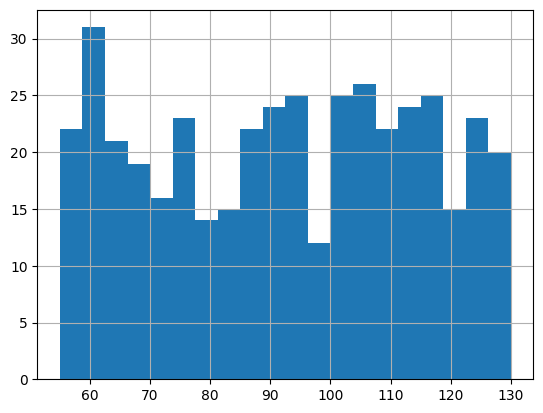

In [0]:
pdf["heart_rate"].hist(bins=20)